In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
n = 200

In [4]:
Armor = np.random.randint(10, 90, n)
WeaponPower = np.random.randint(20, 100, n)
Stamina = np.random.randint(30, 100, n)
Agility = np.random.randint(10, 80, n)
EnemyCount = np.random.randint(1, 20, n)

SurvivalTime = (
    Armor * 0.7 +
    WeaponPower * 0.5 +
    Stamina * 0.6 +
    Agility * 0.4 -
    EnemyCount * 2.5 +
    np.random.randn(n) * 3
)

df = pd.DataFrame({
    "Armor": Armor,
    "WeaponPower": WeaponPower,
    "Stamina": Stamina,
    "Agility": Agility,
    "EnemyCount": EnemyCount,
    "SurvivalTime": SurvivalTime
})

In [5]:
X = df.drop("SurvivalTime", axis=1)
y = df["SurvivalTime"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [7]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 8.305581497524866
R² Score: 0.8730530687625166


In [8]:
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

print(importances)

       Feature  Importance
0        Armor    0.275409
4   EnemyCount    0.257897
2      Stamina    0.244946
1  WeaponPower    0.136132
3      Agility    0.085616


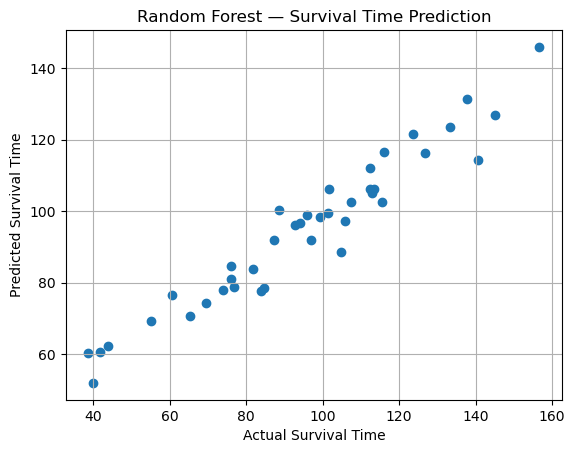

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Survival Time")
plt.ylabel("Predicted Survival Time")
plt.title("Random Forest — Survival Time Prediction")
plt.grid(True)
plt.show()